<a href="https://colab.research.google.com/github/yahya-ansariii/depression/blob/master/Depression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><b>IS Depressed, ML Binary Classification on Reddit Dataset.


By: [Mohammed Yahya Ansari](https://linkedin.com/in/yahya-ansari)

### Data Import and first look

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/yahya-ansariii/depression/master/depression_dataset_reddit.csv")

In [51]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [53]:
df.describe(include = 'all')

,clean_text,is_depression
count,7731,7731.000000
unique,7650,NaN
top,i want to be dead ive been suicidal for year i...,NaN
freq,8,NaN
mean,NaN,0.495537
std,NaN,0.500012
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [54]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [55]:
df.is_depression.value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

<Axes: ylabel='is_depression'>

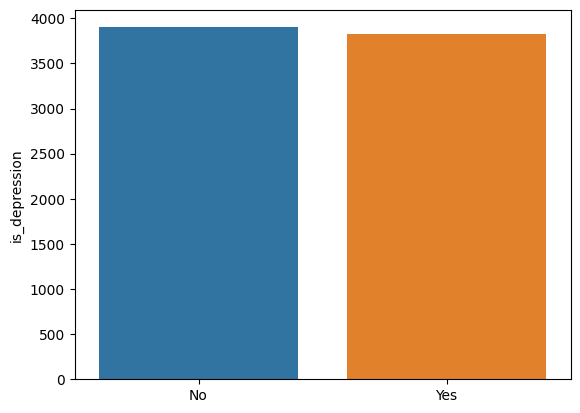

In [56]:
sns.barplot(data = df, x = ['No', 'Yes'], y = df.is_depression.value_counts())

### WordCloud Visualization

In [57]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

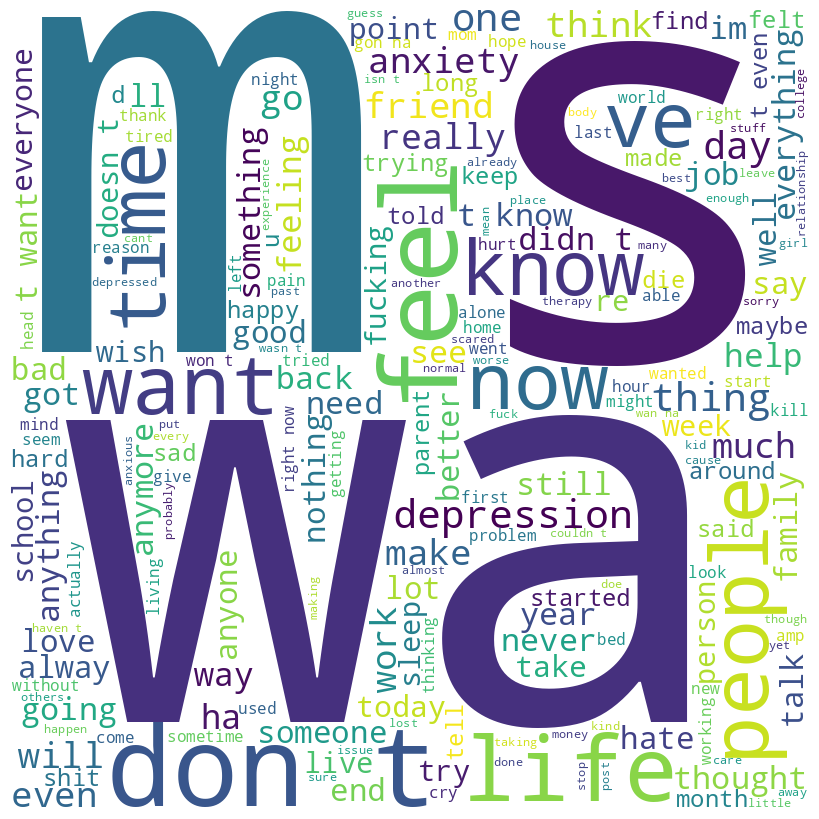

In [58]:
from wordcloud import WordCloud
comment_words = ''

# iterate through the csv file
for val in df.clean_text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [59]:
df.clean_text[0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

### Tokenization

In [60]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [61]:
from nltk.tokenize import word_tokenize

In [62]:
# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    return tokens

In [63]:
# Apply tokenization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(tokenize_text)

### Removing stopwords

In [16]:
# nltk stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Function to remove stopwords
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text if word.lower() not in stopwords]

  return text


In [18]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [19]:
df.head()

,clean_text,is_depression
0,"[understand, people, reply, immediately, op, i...",1
1,"[welcome, r, depression, check, post, place, t...",1
2,"[anyone, else, instead, sleeping, depressed, s...",1
3,"[kind, stuffed, around, lot, life, delaying, i...",1
4,"[sleep, greatest, comforting, escape, whenever...",1


### Applying Lemmatization

In [64]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Function to perform lemmatization on a text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize each word
    return " ".join(lemmatized_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
# Apply lemmatization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [66]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


### Train Test Split

In [67]:
X = df['clean_text']
y = df['is_depression']

In [68]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697)

### TFIDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training

### Model Function

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report




from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [72]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic Regression

In [73]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# model is trained (fit ) and predicted in the evaluate model


Train ROC AUC: 0.9724100973993878
Test ROC AUC: 0.9541522925107304


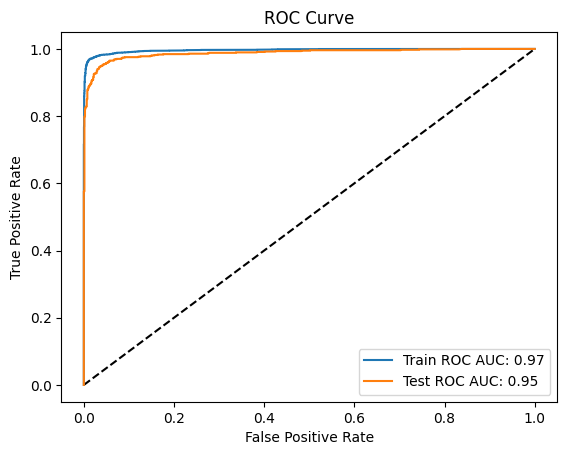


Confusion Matrix:


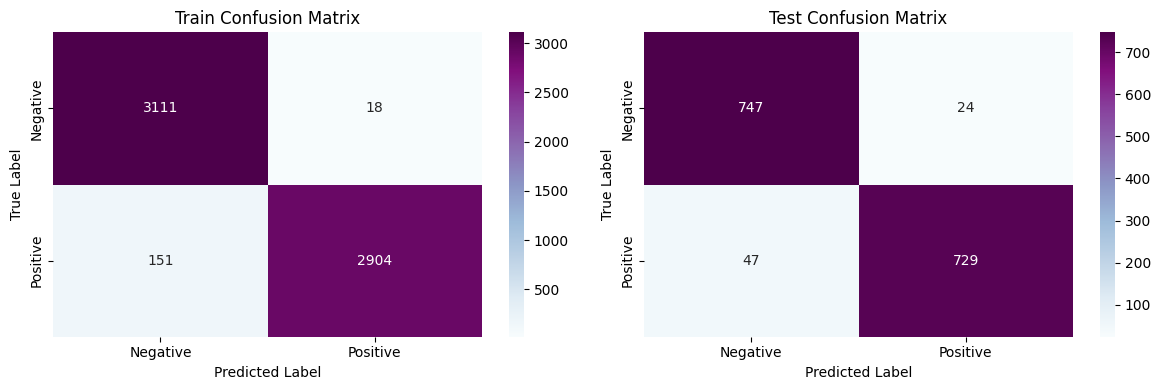


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.953709 | 0.994247 |   0.973557 | 3129        |
| 1            |    0.99384  | 0.950573 |   0.971725 | 3055        |
| accuracy     |    0.972671 | 0.972671 |   0.972671 |    0.972671 |
| macro avg    |    0.973775 | 0.97241  |   0.972641 | 6184        |
| weighted avg |    0.973535 | 0.972671 |   0.972652 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.940806 | 0.968872 |   0.954633 |  771        |
| 1            |    0.968127 | 0.939433 |   0.953564 |  776        |
| accuracy     |    0.954105 | 0.954105 |   0.954105 |    0.954105 |
| macro avg    |    0.954467 | 0.954152 |   0.954099 | 1547        |
| weighted avg |    0.954511 | 0.954105 |   

In [74]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [75]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.973535
Precision Test,0.954511
Recall Train,0.972671
Recall Test,0.954105
Accuracy Train,0.972671
Accuracy Test,0.954105
ROC-AUC Train,0.972410
ROC-AUC Test,0.954152
F1 macro Train,0.972652
F1 macro Test,0.954097


### ML Model - 2 : Random Forest

In [76]:
# Initialize the model
rf = RandomForestClassifier(random_state=0)


Train ROC AUC: 0.9998363338788872
Test ROC AUC: 0.9606791621538503


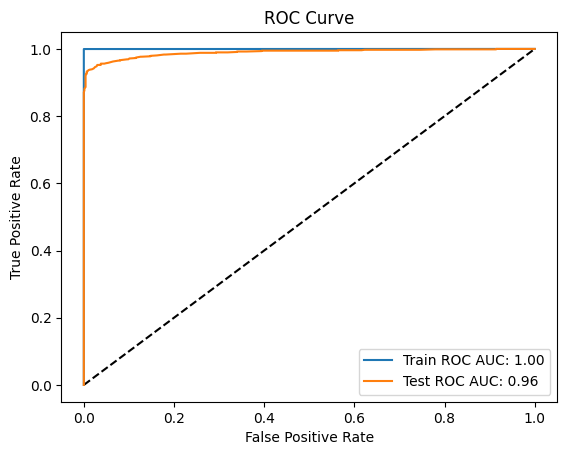


Confusion Matrix:


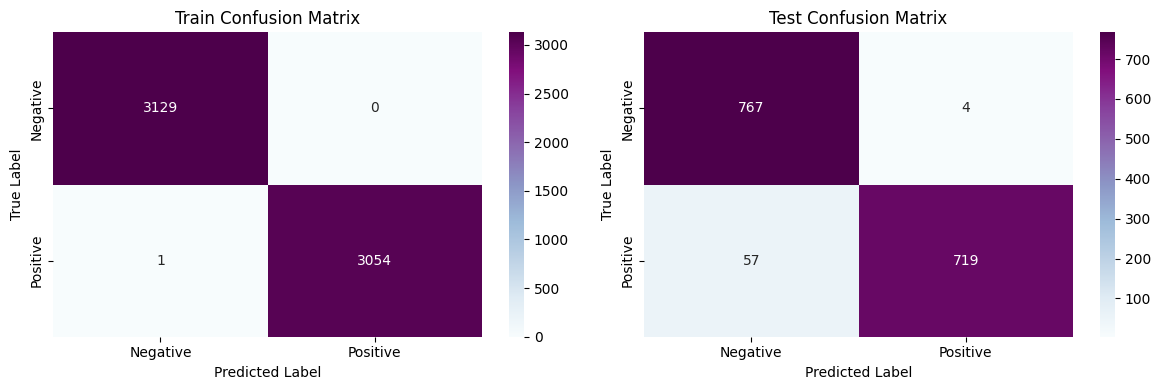


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.999681 | 1        |   0.99984  | 3129        |
| 1            |    1        | 0.999673 |   0.999836 | 3055        |
| accuracy     |    0.999838 | 0.999838 |   0.999838 |    0.999838 |
| macro avg    |    0.99984  | 0.999836 |   0.999838 | 6184        |
| weighted avg |    0.999838 | 0.999838 |   0.999838 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.930825 | 0.994812 |   0.961755 |  771        |
| 1            |    0.994467 | 0.926546 |   0.959306 |  776        |
| accuracy     |    0.960569 | 0.960569 |   0.960569 |    0.960569 |
| macro avg    |    0.962646 | 0.960679 |   0.960531 | 1547        |
| weighted avg |    0.962749 | 0.960569 |   

In [77]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [78]:
score['Random Forest'] = rf_score
score

,Logistic regression,Random Forest
Precision Train,0.973535,0.999838
Precision Test,0.954511,0.962749
Recall Train,0.972671,0.999838
Recall Test,0.954105,0.960569
Accuracy Train,0.972671,0.999838
Accuracy Test,0.954105,0.960569
ROC-AUC Train,0.972410,0.999836
ROC-AUC Test,0.954152,0.960679
F1 macro Train,0.972652,0.999838
F1 macro Test,0.954097,0.960527


### ML Model - 3 : SVM (Support Vector Machine)

In [79]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)


Train ROC AUC: 0.985152830890372
Test ROC AUC: 0.9573697634615641


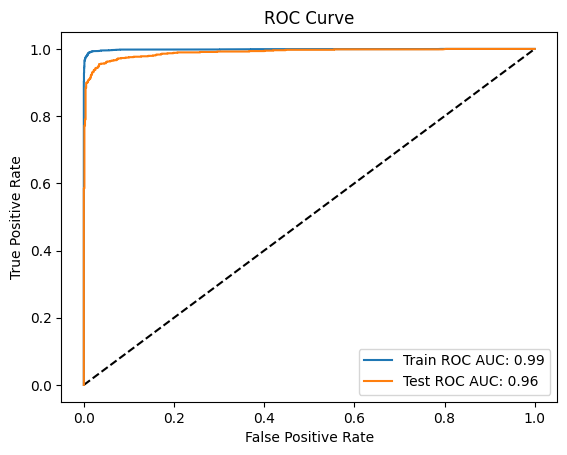


Confusion Matrix:


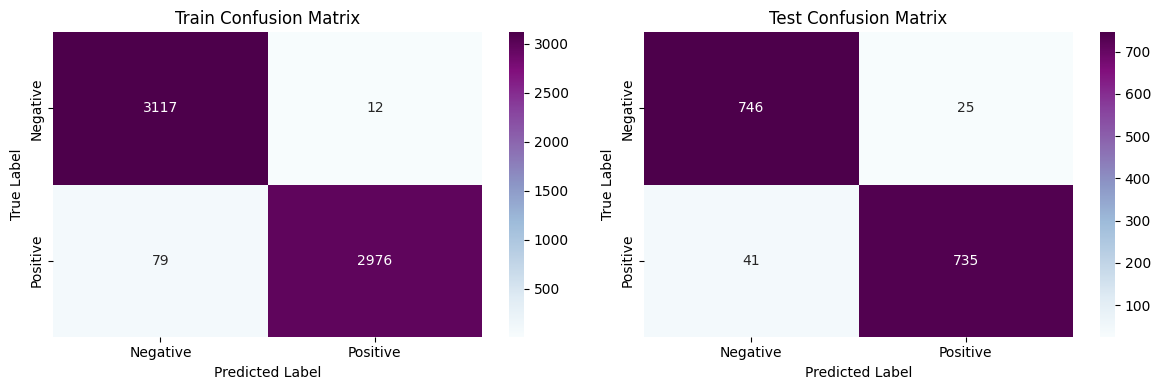


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.975282 | 0.996165 |   0.985613 | 3129        |
| 1            |    0.995984 | 0.974141 |   0.984941 | 3055        |
| accuracy     |    0.985285 | 0.985285 |   0.985285 |    0.985285 |
| macro avg    |    0.985633 | 0.985153 |   0.985277 | 6184        |
| weighted avg |    0.985509 | 0.985285 |   0.985281 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.947903 | 0.967575 |   0.957638 |  771        |
| 1            |    0.967105 | 0.947165 |   0.957031 |  776        |
| accuracy     |    0.957337 | 0.957337 |   0.957337 |    0.957337 |
| macro avg    |    0.957504 | 0.95737  |   0.957335 | 1547        |
| weighted avg |    0.957535 | 0.957337 |   

In [80]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [81]:
score['SVM'] = svm_score
score

,Logistic regression,Random Forest,SVM
Precision Train,0.973535,0.999838,0.985509
Precision Test,0.954511,0.962749,0.957535
Recall Train,0.972671,0.999838,0.985285
Recall Test,0.954105,0.960569,0.957337
Accuracy Train,0.972671,0.999838,0.985285
Accuracy Test,0.954105,0.960569,0.957337
ROC-AUC Train,0.972410,0.999836,0.985153
ROC-AUC Test,0.954152,0.960679,0.957370
F1 macro Train,0.972652,0.999838,0.985281
F1 macro Test,0.954097,0.960527,0.957334


### ML Model - 4 : Naive Bayes

In [82]:
# Initiate model
naive = MultinomialNB()


Train ROC AUC: 0.9314604572922436
Test ROC AUC: 0.8911132616631233


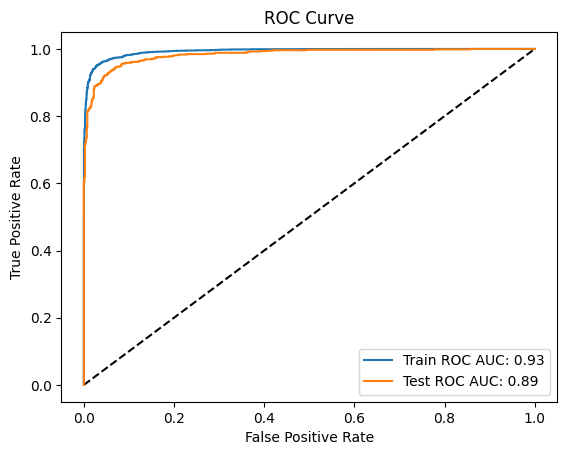


Confusion Matrix:


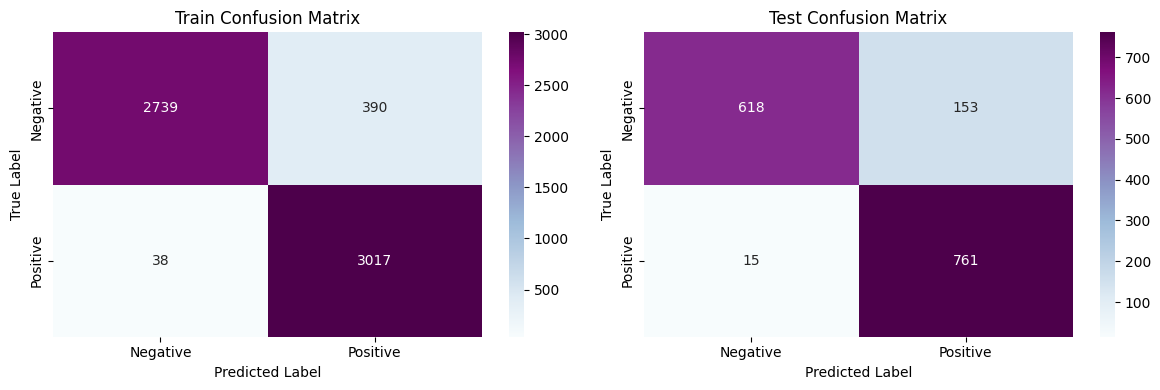


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.986316 | 0.87536  |   0.927531 | 3129        |
| 1            |    0.88553  | 0.987561 |   0.933767 | 3055        |
| accuracy     |    0.930789 | 0.930789 |   0.930789 |    0.930789 |
| macro avg    |    0.935923 | 0.93146  |   0.930649 | 6184        |
| weighted avg |    0.936526 | 0.930789 |   0.930612 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.976303 | 0.801556 |   0.880342 |  771        |
| 1            |    0.832604 | 0.98067  |   0.900592 |  776        |
| accuracy     |    0.891403 | 0.891403 |   0.891403 |    0.891403 |
| macro avg    |    0.904454 | 0.891113 |   0.890467 | 1547        |
| weighted avg |    0.904221 | 0.891403 |   

In [83]:
# Visualizing evaluation Metric Score chart
naive_score = evaluate_model(naive, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [84]:
score['Naive Bayes'] = naive_score
score

,Logistic regression,Random Forest,SVM,Naive Bayes
Precision Train,0.973535,0.999838,0.985509,0.936526
Precision Test,0.954511,0.962749,0.957535,0.904221
Recall Train,0.972671,0.999838,0.985285,0.930789
Recall Test,0.954105,0.960569,0.957337,0.891403
Accuracy Train,0.972671,0.999838,0.985285,0.930789
Accuracy Test,0.954105,0.960569,0.957337,0.891403
ROC-AUC Train,0.972410,0.999836,0.985153,0.931460
ROC-AUC Test,0.954152,0.960679,0.957370,0.891113
F1 macro Train,0.972652,0.999838,0.985281,0.930612
F1 macro Test,0.954097,0.960527,0.957334,0.890500


### ML Model - 5 : Xtreme Gradient Boosting

In [85]:
# Initialize the model
xgb_model = xgb.XGBClassifier()


Train ROC AUC: 0.9913256955810148
Test ROC AUC: 0.959980511318812


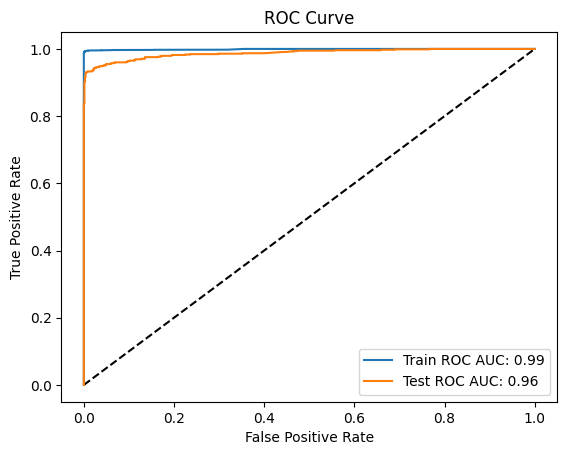


Confusion Matrix:


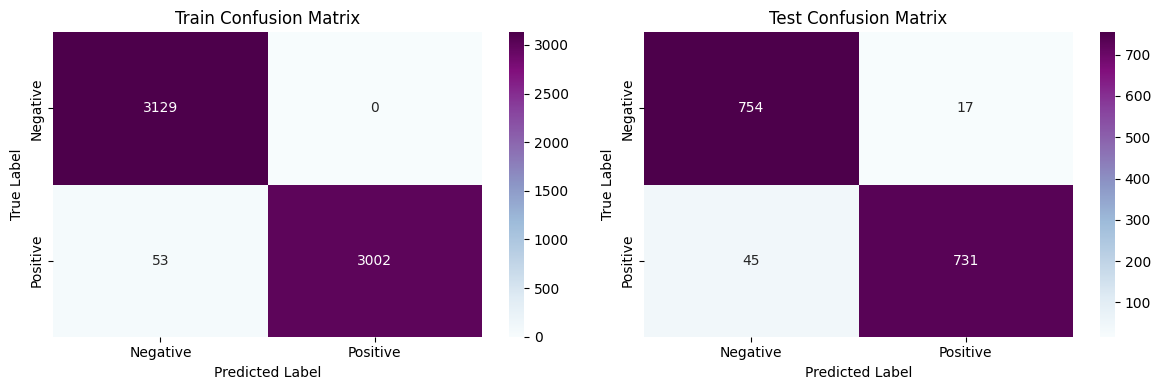


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.983344 | 1        |   0.991602 | 3129        |
| 1            |    1        | 0.982651 |   0.99125  | 3055        |
| accuracy     |    0.991429 | 0.991429 |   0.991429 |    0.991429 |
| macro avg    |    0.991672 | 0.991326 |   0.991426 | 6184        |
| weighted avg |    0.991572 | 0.991429 |   0.991428 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.94368  | 0.977951 |   0.96051  |  771        |
| 1            |    0.977273 | 0.94201  |   0.959318 |  776        |
| accuracy     |    0.959922 | 0.959922 |   0.959922 |    0.959922 |
| macro avg    |    0.960476 | 0.959981 |   0.959914 | 1547        |
| weighted avg |    0.96053  | 0.959922 |   

In [86]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [87]:
score['XGB'] = xgb_score
score

,Logistic regression,Random Forest,SVM,Naive Bayes,XGB
Precision Train,0.973535,0.999838,0.985509,0.936526,0.991572
Precision Test,0.954511,0.962749,0.957535,0.904221,0.960530
Recall Train,0.972671,0.999838,0.985285,0.930789,0.991429
Recall Test,0.954105,0.960569,0.957337,0.891403,0.959922
Accuracy Train,0.972671,0.999838,0.985285,0.930789,0.991429
Accuracy Test,0.954105,0.960569,0.957337,0.891403,0.959922
ROC-AUC Train,0.972410,0.999836,0.985153,0.931460,0.991326
ROC-AUC Test,0.954152,0.960679,0.957370,0.891113,0.959981
F1 macro Train,0.972652,0.999838,0.985281,0.930612,0.991428
F1 macro Test,0.954097,0.960527,0.957334,0.890500,0.959912


### Best model selection

In [88]:
score

,Logistic regression,Random Forest,SVM,Naive Bayes,XGB
Precision Train,0.973535,0.999838,0.985509,0.936526,0.991572
Precision Test,0.954511,0.962749,0.957535,0.904221,0.960530
Recall Train,0.972671,0.999838,0.985285,0.930789,0.991429
Recall Test,0.954105,0.960569,0.957337,0.891403,0.959922
Accuracy Train,0.972671,0.999838,0.985285,0.930789,0.991429
Accuracy Test,0.954105,0.960569,0.957337,0.891403,0.959922
ROC-AUC Train,0.972410,0.999836,0.985153,0.931460,0.991326
ROC-AUC Test,0.954152,0.960679,0.957370,0.891113,0.959981
F1 macro Train,0.972652,0.999838,0.985281,0.930612,0.991428
F1 macro Test,0.954097,0.960527,0.957334,0.890500,0.959912


In [89]:
# Removing the overfitted models which have recall, rocauc, f1 for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.99].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,ROC-AUC Train,ROC-AUC Test,F1 macro Train,F1 macro Test
Logistic regression,0.973535,0.954511,0.972671,0.954105,0.972671,0.954105,0.972410,0.954152,0.972652,0.954097
SVM,0.985509,0.957535,0.985285,0.957337,0.985285,0.957337,0.985153,0.957370,0.985281,0.957334
Naive Bayes,0.936526,0.904221,0.930789,0.891403,0.930789,0.891403,0.931460,0.891113,0.930612,0.890500


In [90]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [91]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.9575
Recall: SVM - 0.9573
Accuracy: SVM - 0.9573
ROC-AUC: SVM - 0.9574
F1 macro: SVM - 0.9573


## Pickling model to deploy

In [48]:
# Import pickle
import pickle

# Save the best model (naive bayes tuned)
pickle.dump(svm, open('svm.pkl', 'wb'))
# Save the tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))

## Merged test data to check on deployed model. (this is unseen data for the model)

In [95]:
testing = pd.DataFrame(data = zip(X_test, y_test))

In [96]:
testing

,0,1
0,theekween depression anxiety and heart break t...,1
1,twittera que me muera,0
2,i rlly hope someone understands this but i ret...,1
3,completely wiped and reloaded the 900 lost all...,0
4,latexfetish sadly that s not a feed for wordpr...,0
...,...,...
1542,i ve had anxiety for a while now but my worst ...,1
1543,kal penn most confusing hour of my life,0
1544,duckling in famous child s book stolen from bo...,0
1545,hmm shoulder is making some bad noise if i mov...,0


In [97]:
# data with label 1
testing[testing[1] == 1]

,0,1
0,theekween depression anxiety and heart break t...,1
2,i rlly hope someone understands this but i ret...,1
5,there s a possibility that for most people wha...,1
8,also the anxiety and post groove depression yh...,1
12,a man in my neighborhood just killed himself i...,1
...,...,...
1532,i graduated not too long ago have work experie...,1
1533,i get into argument with my mum almost everyda...,1
1537,it seems i need to revise my plan especially t...,1
1542,i ve had anxiety for a while now but my worst ...,1


In [105]:
# getting text to test for 1 as prediction
testing[testing[1] == 1].loc[1533][0]

'i get into argument with my mum almost everyday and the reason is because of me i don t intend to start a fight but i always some how manage to my mum ha no tolerance for stress and that s why she is so sensitive to argument because she ha been through a lot from me and my dad i hate to admit but i don t like to be around my family my younger sister doesn t even like to live in the same house a me because of my toxic behaviour and inability to communicate properly i never wanted to hurt anyone but now i ve become a thorn hurting more and more and i have seen my decline over time with how much more severe thing have been in home my mum ha been damaged so much by stress that she is forced to stay in bed for the rest of the day if an argument unfolds and it wont be long until she ha a heart attack from stress unless something change when i go out with friend s once a month or so i m quiet and there is never any trouble caused and i m able to have a break from reality for a few hour until

In [106]:
# getting text to test for 1 as prediction
testing[testing[1] == 1].loc[12][0]

'a man in my neighborhood just killed himself in the same method i am planning it happened a month ago but i just got more detail about it today from my mom she doesn t suspect a thing about me all the story i have heard about when something like this happens is that people rally together but that didn t happen my mom talked about his poor wife and how much his kid are going to miss him and how it must have been some of the medication he wa on she didn t say a thing about him other than it wa sad that he had mental health issue the people in my circle think that people like me and him are worth le than someone healthy they never said that but i can tell they think people like me are hard to love that we have too many demon inside of u that people with depression are letting the devil get to them none of this ha escaped me am i really evil am i letting the devil win the worst part is that they don t know what i m planning to do but i could never say anything because i don t want to hurt

In [110]:
# data with label 0
testing[testing[1] == 0]

,0,1
1,twittera que me muera,0
3,completely wiped and reloaded the 900 lost all...,0
4,latexfetish sadly that s not a feed for wordpr...,0
6,logging out i need to study,0
7,jessdubb lmao u may have to wait for another s...,0
...,...,...
1540,the leeds festival twitter man ha lied there i...,0
1541,in my bed trying helplessly to breathe out of ...,0
1543,kal penn most confusing hour of my life,0
1544,duckling in famous child s book stolen from bo...,0


In [108]:
# getting text to test for 0 as prediction
testing[testing[1] == 0].loc[1545][0]

'hmm shoulder is making some bad noise if i move my arm back and forth i know don t do it fear a return to physio may be required'

In [109]:
# getting text to test for 0 as prediction
testing[testing[1] == 0].loc[989][0]

'my friend coco chris had a party this weekend and it seemed to have been awesome fail i wasnae there'